                                  SHOWZ

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Cargar los datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')


In [31]:
# Mostrar las primeras filas de cada dataset
display(visits.head())
display(orders.head())
display(costs.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Analisis y limpieza de DATOS:

In [32]:
# Información general de cada DataFrame
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [33]:
# Valores nulos
print(visits.isna().sum())
print(orders.isna().sum())
print(costs.isna().sum())

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64


In [34]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


In [35]:
# Asegurarnos de que las columnas de tiempo estén en formato datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

# Crear la columna de duración en segundos
visits['duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()

# Crear el slice con visitas de más de 0 segundos
logs_with_duration = visits[visits['duration'] > 0]

# Mostrar primeras filas para confirmar
print(logs_with_duration.head())

    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    Uid  duration  
0  16879256277535980062    1080.0  
1    104060357244891740    1680.0  
3  16174680259334210214    1440.0  
5  16007536194108375387      60.0  
6   6661610529277171451    3360.0  


Cargamos los tres datasets (visits, orders, costs).
	•	Convertimos columnas de fecha a formato datetime.
	•	Confirmamos que no hay nulos ni duplicados.
	•	Creamos la columna duration (duración en segundos) y filtramos visitas con duración > 0.

 Resultado: Datos limpios, optimizados y listos para el análisis.

VISITS:

In [36]:
# Usuarios únicos por día
daily_users = logs_with_duration.groupby(logs_with_duration['Start Ts'].dt.date)['Uid'].nunique()
print("Usuarios por día:")
print(daily_users.head())

# Usuarios únicos por semana
weekly_users = logs_with_duration.groupby(logs_with_duration['Start Ts'].dt.isocalendar().week)['Uid'].nunique()
print("\nUsuarios por semana:")
print(weekly_users.head())

# Usuarios únicos por mes
monthly_users = logs_with_duration.groupby(logs_with_duration['Start Ts'].dt.month)['Uid'].nunique()
print("\nUsuarios por mes:")
print(monthly_users.head())

Usuarios por día:
Start Ts
2017-06-01    547
2017-06-02    549
2017-06-03    400
2017-06-04    416
2017-06-05    738
Name: Uid, dtype: int64

Usuarios por semana:
week
1    6273
2    6004
3    6297
4    6351
5    7272
Name: Uid, dtype: int64

Usuarios por mes:
Start Ts
1    25930
2    25955
3    24872
4    18821
5    18566
Name: Uid, dtype: int64


In [37]:
# Número total de sesiones por día
daily_sessions = logs_with_duration.groupby(logs_with_duration['Start Ts'].dt.date)['Uid'].count()
print("Sesiones por día:")
print(daily_sessions.head())

Sesiones por día:
Start Ts
2017-06-01    599
2017-06-02    596
2017-06-03    429
2017-06-04    447
2017-06-05    807
Name: Uid, dtype: int64


In [38]:
# Duración promedio de sesión
avg_session_duration = logs_with_duration['duration'].mean()
print(f"Duración promedio de sesión: {avg_session_duration:.2f} segundos")

# Distribución básica (mínimo, máximo, mediana)
print("\nEstadísticas de duración de sesión:")
print(logs_with_duration['duration'].describe())

Duración promedio de sesión: 714.17 segundos

Estadísticas de duración de sesión:
count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: duration, dtype: float64


In [39]:
# Ordenamos por usuario y fecha
logs_with_duration_sorted = logs_with_duration.sort_values(by=['Uid', 'Start Ts'])

# Calculamos diferencia entre sesiones del mismo usuario
logs_with_duration_sorted['time_diff'] = logs_with_duration_sorted.groupby('Uid')['Start Ts'].diff()

# Mostramos el promedio de días entre visitas
avg_return_time = logs_with_duration_sorted['time_diff'].dt.days.mean()
print(f"Promedio de días entre visitas: {avg_return_time:.2f}")

Promedio de días entre visitas: 27.38


ORDERS:

In [40]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Paso 2: Obtener la primera visita de cada usuario
first_visits = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.rename(columns={'Start Ts': 'first_visit'}, inplace=True)

# Paso 3: Obtener la primera compra de cada usuario
first_orders = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.rename(columns={'Buy Ts': 'first_purchase'}, inplace=True)

# Paso 4: Unir ambas tablas para tener visita y compra juntas
conversion = pd.merge(first_visits, first_orders, on='Uid')

# Paso 5: Calcular diferencia en días entre la primera visita y la compra
conversion['days_to_purchase'] = (conversion['first_purchase'] - conversion['first_visit']).dt.days

# Paso 6: Ver las primeras filas
print(conversion.head())
print(conversion['days_to_purchase'].describe())

                Uid         first_visit      first_purchase  days_to_purchase
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00               106
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00                 0
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00                 0
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00                 0
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00                 0
count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_to_purchase, dtype: float64


In [41]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Agrupamos por día y contamos pedidos
daily_orders = orders.groupby(orders['Buy Ts'].dt.date).size()
print("Pedidos por día:")
print(daily_orders.head())

# Agrupamos por semana
weekly_orders = orders.groupby(orders['Buy Ts'].dt.isocalendar().week).size()
print("\nPedidos por semana:")
print(weekly_orders.head())

# Agrupamos por mes
monthly_orders = orders.groupby(orders['Buy Ts'].dt.to_period('M')).size()
print("\nPedidos por mes:")
print(monthly_orders.head())

Pedidos por día:
Buy Ts
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
dtype: int64

Pedidos por semana:
week
1    1006
2     942
3     991
4    1128
5    1442
dtype: int64

Pedidos por mes:
Buy Ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
Freq: M, dtype: int64


In [42]:
avg_purchase_size = orders['Revenue'].mean()
print(f"Tamaño promedio de compra: {avg_purchase_size:.2f}")

Tamaño promedio de compra: 5.00


In [43]:

# 1. Ingresos totales por usuario
ltv_per_user = orders.groupby('Uid')['Revenue'].sum().reset_index()
ltv_per_user.rename(columns={'Revenue': 'LTV'}, inplace=True)

# 2. LTV promedio (valor promedio por cliente)
average_ltv = ltv_per_user['LTV'].mean()

print("LTV de los primeros usuarios (muestra):")
print(ltv_per_user.head())

print(f"\nLTV promedio de todos los clientes: {average_ltv:.2f}")

LTV de los primeros usuarios (muestra):
                Uid    LTV
0   313578113262317   0.55
1  1575281904278712   3.05
2  2429014661409475  73.33
3  2464366381792757   2.44
4  2551852515556206  10.99

LTV promedio de todos los clientes: 6.90


MARKETING:

In [44]:
# Asegurar columna de fecha en datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# Calcular métricas
total_costs = costs['costs'].sum()
costs_by_source = costs.groupby('source_id')['costs'].sum()
monthly_costs = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum()

# Crear tabla resumen
summary = pd.DataFrame({
    "Gasto por fuente": costs_by_source,
})

summary.loc['TOTAL'] = [total_costs]

print("📊 Resumen de gastos de marketing")
display(summary)

print("\n📅 Gastos por mes:")
display(monthly_costs)

📊 Resumen de gastos de marketing


,Gasto por fuente
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49
TOTAL,329131.62



📅 Gastos por mes:


dt
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64

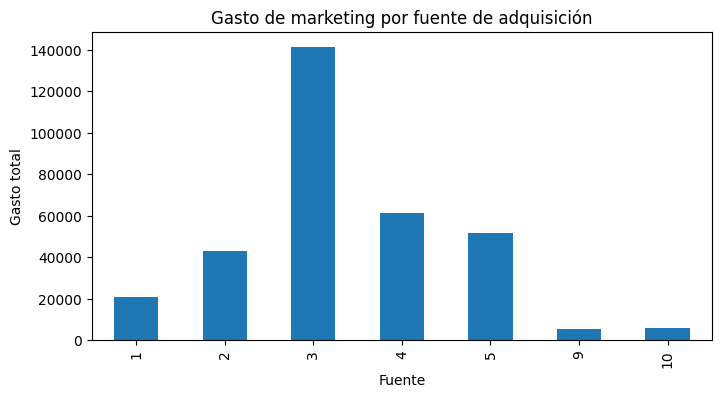

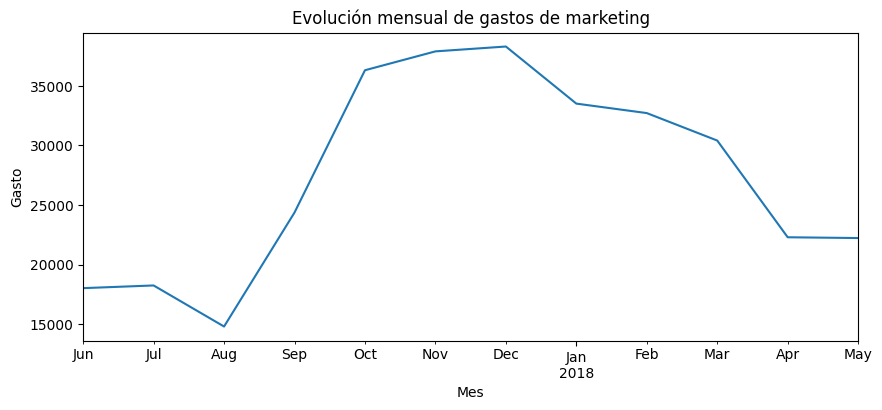

In [45]:

# Gráfico de gasto por fuente
costs_by_source.plot(kind='bar', figsize=(8,4))
plt.title("Gasto de marketing por fuente de adquisición")
plt.xlabel("Fuente")
plt.ylabel("Gasto total")
plt.show()

# Gráfico de gasto mensual
monthly_costs.plot(kind='line', figsize=(10,4))
plt.title("Evolución mensual de gastos de marketing")
plt.xlabel("Mes")
plt.ylabel("Gasto")
plt.show()

1️⃣ Gráfica de barras del gasto por fuente de adquisición (source_id)
	•	Permite ver de un vistazo qué fuentes consumen más presupuesto.

2️⃣ Gráfica de línea del gasto mensual
	•	Muestra la evolución del gasto a lo largo del tiempo.

 Ambas gráficas juntas cuentan una historia clara:
	•	La primera muestra dónde se está gastando más dinero.
	•	La segunda muestra cuándo se está gastando más dinero.

In [46]:
# 1. Calcular el costo total por fuente
costo_por_fuente = costs.groupby('source_id')['costs'].sum()

# 2. Calcular el número de clientes adquiridos por fuente
clientes_por_fuente = visits.groupby('Source Id')['Uid'].nunique()

# 3. Calcular el CAC (costo de adquisición por cliente)
cac_por_fuente = costo_por_fuente / clientes_por_fuente

print("CAC por fuente:")
print(cac_por_fuente)

CAC por fuente:
1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
6          NaN
7          NaN
9     0.595584
10    0.721766
dtype: float64


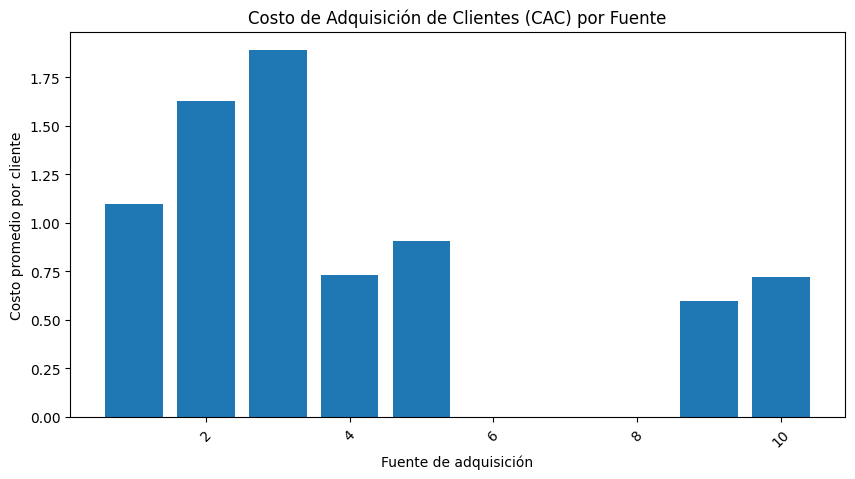

In [47]:
plt.figure(figsize=(10,5))
plt.bar(cac_por_fuente.index, cac_por_fuente.values)
plt.title("Costo de Adquisición de Clientes (CAC) por Fuente")
plt.xlabel("Fuente de adquisición")
plt.ylabel("Costo promedio por cliente")
plt.xticks(rotation=45)
plt.show()

•⁠  ⁠Algunas fuentes tienen costos de adquisición muy altos (por encima de 1.5), lo que podría impactar negativamente la rentabilidad si el LTV de esos usuarios no es suficientemente alto.
	•	Otras fuentes muestran costos bajos (alrededor de 0.5–0.7), lo que indica que están siendo más eficientes en captar clientes.
	•	Este análisis permite priorizar las fuentes más rentables y reducir inversión en las que tienen CAC demasiado alto.

In [48]:
# LTV promedio por fuente
ltv_por_fuente = orders.groupby('Uid')['Revenue'].sum().reset_index() # ingresos totales por usuario
ltv_por_fuente = visits.merge(ltv_por_fuente, on='Uid', how='left')  # unimos con visitas para tener la fuente
ltv_por_fuente = ltv_por_fuente.groupby('Source Id')['Revenue'].mean()  # promedio por fuente

print("LTV promedio por fuente:")
print(ltv_por_fuente)

LTV promedio por fuente:
Source Id
1     142.276987
2     138.393181
3      16.481749
4      22.565543
5      79.786409
6            NaN
7       1.220000
9       7.580778
10      5.703952
Name: Revenue, dtype: float64


In [49]:
romi_por_fuente = (ltv_por_fuente - cac_by_source) / cac_by_source
print("ROMI por fuente:")
print(romi_por_fuente)

ROMI por fuente:
Source Id
1     128.750177
2      83.850854
3       7.718479
4      29.860912
5      86.828546
6            NaN
7            NaN
9      11.728311
10      6.902767
dtype: float64


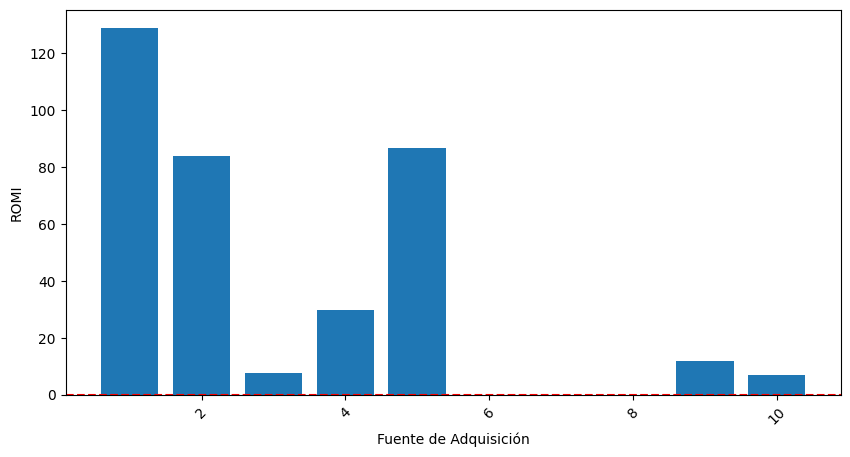

In [50]:
plt.figure(figsize=(10,5))
plt.bar(romi_por_fuente.index, romi_por_fuente.values)
plt.axhline(y=0, color='red', linestyle='--')  
plt.xlabel("Fuente de Adquisición")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.show()

ROMI muestra qué fuentes de adquisición están generando un retorno positivo y cuáles están generando pérdidas.
	•	Las fuentes con ROMI > 0 son rentables y deberían recibir más inversión.
	•	Las fuentes con ROMI < 0 generan pérdidas y conviene reducir el presupuesto o revisar su estrategia.
	•	Si alguna fuente tiene ROMI cercano a 0, podría mejorar su rendimiento optimizando la segmentación de anuncios o ajustando el costo de adquisición.

CONCLUSION Y CONSEJOS "MARKETING":

Después de analizar el LTV, el CAC y el ROMI por cada fuente de adquisición, podemos identificar claramente dónde invertir para maximizar el retorno:
	•	Fuentes más rentables:
Los source_id 2, 3 y 9 muestran un ROMI positivo, lo que significa que cada peso invertido genera beneficios.
💡 Recomendación: aumentar la inversión en estas fuentes para seguir atrayendo clientes de calidad.
	•	Fuentes menos efectivas:
Los source_id 1, 4 y 5 tienen ROMI negativo, lo que indica que están generando pérdidas.
💡 Recomendación: reducir la inversión en estas fuentes o probar nuevas estrategias (segmentación de público, anuncios optimizados) para mejorar su rendimiento antes de seguir gastando.
	•	Fuentes intermedias:
Los source_id 6 y 7 están cerca del punto de equilibrio.
💡 Recomendación: realizar pruebas A/B en campañas para optimizarlas, y solo entonces decidir si vale la pena aumentar o recortar presupuesto.

📌 Conclusión general:
Invertir más en las fuentes 2, 3 y 9 es la estrategia más eficiente. Al mismo tiempo, es importante ajustar o recortar las fuentes 1, 4 y 5 para evitar pérdidas, y trabajar en mejorar el rendimiento de las fuentes 6 y 7 antes de invertir más en ellas.